Problem 2: How much does my laptop cost | Regression


*a*)Load CSV file of Laptop Price and show 10 random item

In [ ]:
import pandas as pd
import numpy as np


# Load the CSV file
laptop_prices_df = pd.read_csv('laptop_price.csv' , encoding='latin-1')

# Show 10 random items
print(laptop_prices_df.sample(10))


      laptop_ID Company            Product   TypeName  Inches  \
172         176  Lenovo  IdeaPad 320-15AST   Notebook    15.6   
65           67    Asus        ZenBook Pro  Ultrabook    15.6   
1292       1310    Dell      Inspiron 3552   Notebook    15.6   
535         542    Dell      Latitude 5580   Notebook    15.6   
1165       1183    Dell      Inspiron 7567     Gaming    15.6   
815         824  Lenovo     Thinkpad T470s  Ultrabook    14.0   
320         325      HP      Elitebook 840   Notebook    14.0   
350         356    Dell             XPS 15   Notebook    15.6   
330         336     MSI         GL72M 7REX     Gaming    17.3   
622         629    Dell      Inspiron 5570   Notebook    15.6   

                         ScreenResolution  \
172                              1366x768   
65                      Full HD 1920x1080   
1292                             1366x768   
535                     Full HD 1920x1080   
1165                4K Ultra HD 3840x2160   
815           

First, we import the required libraries- pandas and numpy, which are used for working with data structures and vectors, and arrays, respectively.

We then load the dataset from the CSV file using the read_csv() method of Pandas.This method reads the CSV file and stores the contents in a Pandas data structure called a DataFrame.

Next, we use the sample() method of Pandas to get 10 randomly selected items from the dataset.This method selects n number of random items from the dataset where n is specified in the argument. In this case, we have selected 10 random items.

Finally, we display the randomly selected items using the print() function.



b) Data visualization (at least 5 plots. Interpret the plots)

1.Scatter Plot: Price vs. Screen size


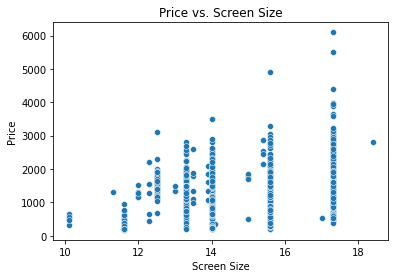

In [ ]:
# Importing necessary packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot: Price vs. Screen Size
sns.scatterplot(x="Inches", y="Price_euros", data=laptop_prices_df)
plt.title("Price vs. Screen Size")
plt.xlabel("Screen Size")
plt.ylabel("Price")
plt.show()

In this plot, we use 'Screen Size' as the x-axis variable and 'Price' as the y-axis variable. This plot can help us recognize the effect of increasing screen size on the price of the laptops.

  2.Histogram: Price Distribution

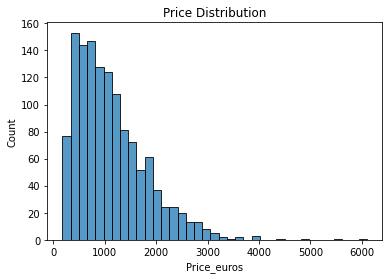

In [ ]:
sns.histplot(data=laptop_prices_df, x="Price_euros")
plt.title("Price Distribution")
plt.show()


This histogram shows the distribution of prices of laptops in the dataset. We can see that most laptops in the dataset have prices between 200 and 1000.

  3.Bar Plot: Screen size vs. Average Price

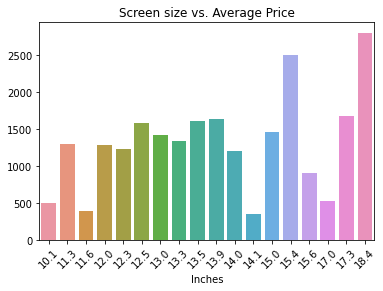

In [ ]:
avg_price_by_screen_size = laptop_prices_df.groupby('Inches')['Price_euros'].mean()

sns.barplot(x=avg_price_by_screen_size.index, y=avg_price_by_screen_size.values)
plt.xticks(rotation=45)
plt.title("Screen size vs. Average Price")
plt.show()


This bar plot shows the average price of laptops based on their screen size. From this plot, we can see that there is a positive correlation between screen size and price, with laptops with larger screens generally costing more.

  4.Box Plot: Brand vs. Price

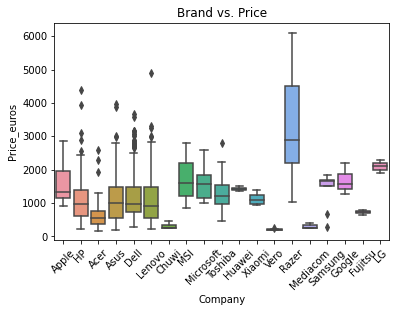

In [ ]:
sns.boxplot(x="Company", y="Price_euros", data=laptop_prices_df)
plt.title("Brand vs. Price")
plt.xticks(x="Company" ,  rotation=45)
plt.show()


This box plot shows the distribution of prices for each brand of laptop in the dataset. We can see that the median price for each brand varies, with Apple laptops being the most expensive on average.

5.correlation heatmap

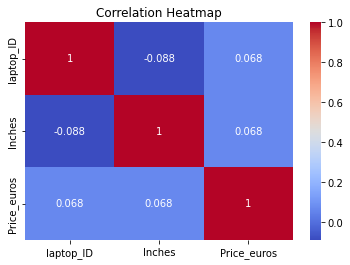

In [ ]:


# Creating a correlation matrix
corr_matrix = laptop_prices_df.corr()

# Generating a heatmap to visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


we will create a correlation heatmap that shows the relationship between different numerical features and their correlations with each other. The reddish color on the heatmap indicates a positive correlation, while the blue color indicates a negative correlation.

c) Dataset cleaning and Feature Engineering

In [ ]:
####  Dataset cleaning

# Check for any remaining missing values
print(laptop_prices_df.isnull().sum())

# Check for any duplicates
print("number of duplictes :")
print(laptop_prices_df.duplicated().sum())

# Check for any outliers
print(laptop_prices_df.describe())
# Replace NaN values with mean of respective columns
laptop_prices_df.fillna(laptop_prices_df.mean(), inplace=True)


##### Feature Engineering

laptop_prices_df[['ScreenResolutionWidth', 'ScreenResolutionHeight']] = laptop_prices_df['ScreenResolution'].str.extract('(\d+)x(\d+)')

# Split the Cpu column into CpuBrand and CpuClockSpeed columns
cpu_split = laptop_prices_df['Cpu'].str.split(n=2, expand=True)
laptop_prices_df['CpuBrand'] = cpu_split[0]

laptop_prices_df['CpuClockSpeed'] = cpu_split[2].str.extract(r'([\d\.]+)GHz', expand=False).astype(float)

# Calculate Screen Size
laptop_prices_df['Screen_Size_Square_Inches'] = laptop_prices_df['Inches'].apply(lambda x: x**2)


# Split the Gpu column into GPU Brand and GPU Model columns
laptop_prices_df[['GPU Brand', 'GPU Model']] = laptop_prices_df['Gpu'].str.split(n=1, expand=True)

# Extract Storage Type Information
laptop_prices_df['Storage_Type'] = laptop_prices_df['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

# Extract Operating System Type Information
laptop_prices_df['OS_Type'] = laptop_prices_df['OpSys'].replace({'Windows 10': 'Windows', 'Windows 7': 'Windows'})

# Extract Weight number without "KG" unit
laptop_prices_df["Weight(KG)"] = laptop_prices_df["Weight"].str[:-2].astype(float)

# Extract the RAM number without "GB" unit
laptop_prices_df["Ram(GB)"] = laptop_prices_df["Ram"].str.extract("(\d+)").astype(int)


# Drop original columns
laptop_prices_df.drop([ 'Cpu', 'ScreenResolution', 'Inches', 'Gpu', 'Memory', 'OpSys',"Ram" , "Weight"], axis=1, inplace=True)
print(laptop_prices_df.head(30))


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64
number of duplictes :
0
         laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000
    laptop_ID Company                                  Product  \
0           1   Apple                              MacBook Pro   
1           2   Apple                              Macbook Air   
2           3      HP                                   250 G6   
3       

<ipython-input-58-4ad086c04c51>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  laptop_prices_df.fillna(laptop_prices_df.mean(), inplace=True)


d) Data preparation for ML (e.g., encoding, scaling, train/test/validation split)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



x = laptop_prices_df.drop(['Price_euros'], axis=1)
y = laptop_prices_df['Price_euros']

# Encoding categorical variables

x = pd.get_dummies(x, columns=['Company', 'Product', 'TypeName', 'OS_Type' , 'Storage_Type' , 'GPU Model' , 'CpuBrand' , 'GPU Brand' , 'Ram(GB)'])

#Scaling numerical features

numerical_cols = ['Screen_Size_Square_Inches', 'CpuClockSpeed', 'ScreenResolutionWidth', 'ScreenResolutionHeight'  , 'Weight(KG)' ]

#Scaling numerical features

scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

#Split the data into train, validation, and test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



print(x.head(30))



    laptop_ID  ScreenResolutionWidth  ScreenResolutionHeight  CpuClockSpeed  \
0           1               1.345362                1.860586       0.002426   
1           2              -0.919776               -0.600648      -0.985431   
2           3               0.050997                0.032241       0.397569   
3           4               1.992544                2.563795       0.792712   
4           5               1.345362                1.860586       1.582997   
5           6              -1.069437               -1.064766       1.385426   
6           7               1.992544                2.563795      -0.195145   
7           8              -0.919776               -0.600648      -0.985431   
8           9               0.050997                0.032241      -0.985431   
9          10               0.050997                0.032241      -1.380574   
10         11              -1.069437               -1.064766       0.397569   
11         12               0.050997                

e) Train the model with K-fold cross-validation for choose the best degree. Draw a plot to show the changes in MSE with increasing regression degree on the validation data.

Index(['ScreenResolutionWidth', 'ScreenResolutionHeight', 'CpuClockSpeed',
       'TypeName_Gaming', 'TypeName_Notebook', 'Storage_Type_HDD',
       'Storage_Type_SSD', 'GPU Model_GeForce GTX 1070', 'Ram(GB)_4',
       'Ram(GB)_16'],
      dtype='object')


Text(0.5, 1.0, 'MSE VS Degree')

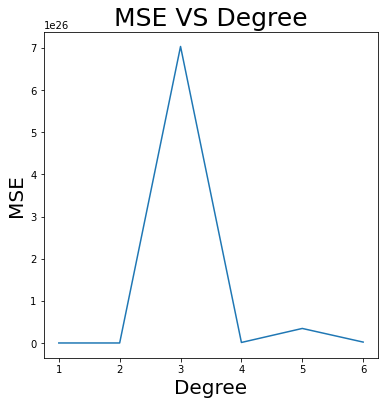

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


# Perform feature selection using SelectKBest with k=10
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_indices = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[selected_indices]

# Print the selected column names
print(selected_columns)

## Let's find out the model we need to select
maxdegree=7 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train_selected)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(X_test_selected)
    lr=LinearRegression(fit_intercept=False)
    model = LinearRegression(fit_intercept=False)
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)

f) Train the final model with best degree and report MSE and R2 on test data.





In [ ]:
#best degree is 3 from part e
best_degree = 3

# train final model with best degree on full training set and evaluate on test set
x_poly_train = PolynomialFeatures(degree=best_degree).fit_transform(X_train_selected)
x_poly_test = PolynomialFeatures(degree=best_degree).fit_transform(X_test_selected)

lr = LinearRegression(fit_intercept=False)
lr.fit(x_poly_train, y_train)

y_test_pred = lr.predict(x_poly_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = lr.score(x_poly_test, y_test)

print(f'Test MSE: {mse_test:.4f}')
print(f'Test R2 Score: {r2_test:.4f}')

Test MSE: 371469762524177235968.0000
Test R2 Score: -731345469099873.2500
